# restart

In [1]:
#!/usr/local/bin/python

import os, sys
import json
import numpy as np
import matplotlib.pyplot as plt
import chainer
from chainer import cuda
from matplotlib import animation
from optparse import OptionParser

from elecpy.util.cmap_bipolar import bipolar
import elecpy.elecpy as elp

from matplotlib import animation, rc
from IPython.display import HTML

import time

%matplotlib inline

In [17]:
# load sample parameter
with open ('sim_params_org.json','r') as f:
    sim_params = json.load(f)

# modify parameters
sim_params['time']['end'] = 1000
sim_params["stimulation"] = {}
#sim_params["stimulation"]["extracellular"][0]["start"] = 0.
#sim_params["stimulation"]["extracellular"][0]["duration"] = 10.
sim_params['log']['path'] = '/mnt/recordings/SimulationResult/20180525-1'

sim_params['geometory']['height'] = 200
sim_params['geometory']['width'] = 200

sim_params['restart'] = {}
sim_params['restart']['count'] = 0
#sim_params['restart']['source'] = "/mnt/recordings/SimulationResult/20170809-4/"
#sim_params['restart']['source'] = "/mnt/recordings/SimulationResult/20180524-2/"
sim_params['restart']['source'] = "/mnt/recordings/SimulationResult/20171128-1/"

print json.dumps(sim_params, indent=4)

{
    "cell_type": "mahajan", 
    "log": {
        "path": "/mnt/recordings/SimulationResult/20180525-1", 
        "cnt": 1000
    }, 
    "stimulation": {}, 
    "time": {
        "end": 1000, 
        "udt": 0.001
    }, 
    "geometory": {
        "width": 200, 
        "ds": 0.015, 
        "height": 200
    }, 
    "restart": {
        "count": 0, 
        "source": "/mnt/recordings/SimulationResult/20171128-1/"
    }
}


In [18]:
g = elp.sim_generator(sim_params)

In [23]:
!rm -r /mnt/recordings/SimulationResult/20180525-1

In [24]:
os.mkdir(sim_params['log']['path'] )

In [25]:
vm = np.load(os.path.join(sim_params['restart']['source'], 'cell_0000/m.npy'))
vm.shape

(40000,)

In [26]:
out = []
while True:
    img = g.next()
    if img is False: break
    out.append(np.copy(img))

elecpy simulation start!


/root/.pyenv/versions/anaconda2-4.3.1/lib/python2.7/site-packages/chainer/cuda.py:84: UserWarning: cuDNN is not enabled.
Please reinstall CuPy after you install cudnn
(see https://docs-cupy.chainer.org/en/stable/install.html#install-cupy-with-cudnn-and-nccl).
  'cuDNN is not enabled.\n'


Stimulation settings ...done
Allocating data... ...done
Initializing data... ...done
Building PDE system ... ...done
Main loop start!
------------------0.0ms
------------------1.0ms
------------------2.0ms
------------------3.0ms
------------------4.0ms
------------------5.0ms
------------------6.0ms
------------------7.0ms
------------------8.0ms
------------------9.0ms
------------------10.0ms
------------------11.0ms
------------------12.0ms
------------------13.0ms
------------------14.0ms
------------------15.0ms
------------------16.0ms
------------------17.0ms
------------------18.0ms
------------------19.0ms
------------------20.0ms
------------------21.0ms
------------------22.0ms
------------------23.0ms
------------------24.0ms
------------------25.0ms
------------------26.0ms
------------------27.0ms
------------------28.0ms
------------------29.0ms
------------------30.0ms
------------------31.0ms
------------------32.0ms
------------------33.0ms
------------------34.0ms
-

## Check results

In [3]:
from elecpy.elecpySession import ElecpySession

In [4]:
sess = ElecpySession(sim_params['log']['path'])
sess.data.keys()

['phie', 'tone', 'vmem', 'cell/m', 'cell/j', 'cell/h', 'cell/xina']

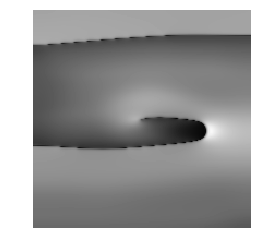

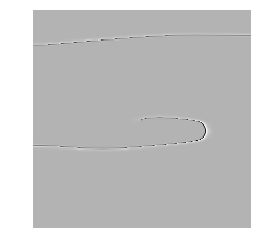

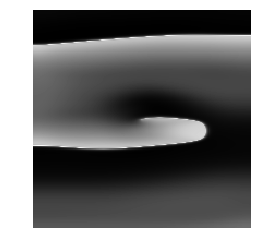

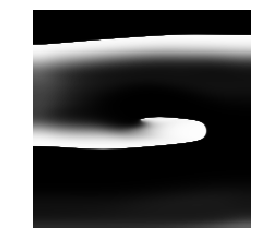

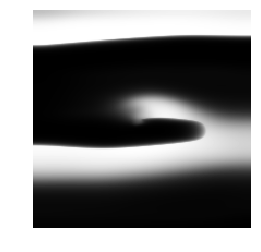

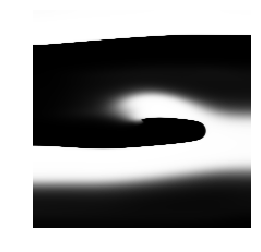

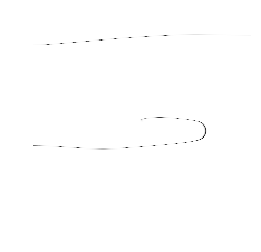

In [5]:
#os.mkdir('./cell')
sess.saveAnimation('./')

In [15]:
plt.imsave?

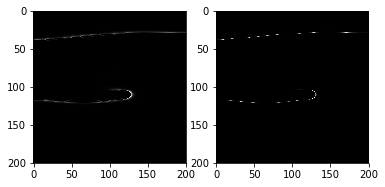

In [16]:
img_tone = sess.data['tone'][10,:,:]
img_xina = -sess.data['cell/xina'][11,:,:]
plt.subplot('121')
plt.imshow(img_tone, vmin=0, vmax = img_tone.max(), cmap='gray')
plt.imsave( './tone.bmp', img_tone)
plt.subplot('122')
plt.imshow(img_xina, vmin=img_xina.min(), vmax = img_xina.max(), cmap='gray')
plt.imsave('./xina.bmp', img_xina)

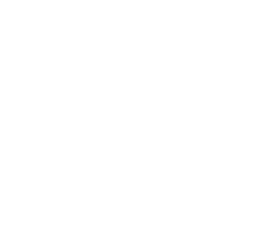

In [12]:
fig = plt.figure()
plt.axis('off')

ims = []
for img in out:
    im = plt.imshow(
        img.reshape(200,200),
        vmin = -100.0, vmax = 20.0,
        cmap=bipolar(neutral=0, lutsize=1024),
        interpolation='nearest')
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims)
#ani.save('anim.gif', writer="imagemagick")
#ani.save('anim.mp4', writer="ffmpeg")
#plt.show()

HTML(ani.to_html5_video())
